In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os
from pathlib import Path

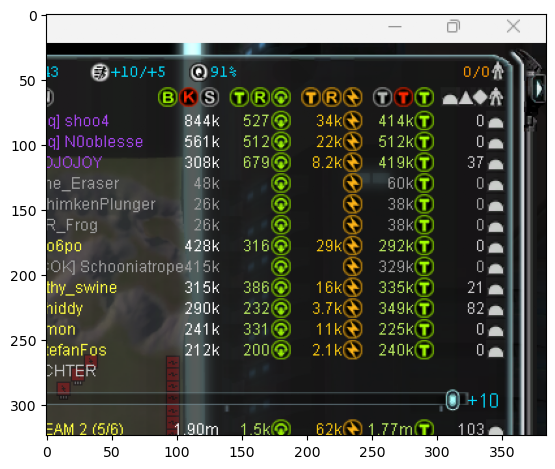

In [8]:

pfad = r"pictures/screenshot_20250911_025258.png"

img = mpimg.imread(pfad)
height, width, _ = img.shape

crop_top = int(height * 0.0)  #  oben
crop_bottom = int(height * (1 - 0.7))  #  unten
crop_left = int(width * 0.8)  #  links
crop_right = int(width * (1 - 0.0))  #  rechts


# Bild zuschneiden
cropped_img = img[crop_top:crop_bottom, crop_left:crop_right]
plt.imshow(cropped_img)

# Plot anzeigen
plt.tight_layout()
plt.show()